In [1]:
import numpy as np
import sympy as sy
import math
import gc
from numpy.random import default_rng
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#
#Definimos las matrices de Gell-Mann
#

l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

#
#Definimos el producto entre matrices y los coeficientes matriciales;
#
Ra = default_rng(42).random((3,3))
def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr = np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr


#Datos númericos (Masas M y sus errores dM)
#Quarks up eV
u = 2.16e+6
du= 0.49e+6
c = 1.27e+9
dc= 0.02e+9
t = 1.7269e+11
dt= 0.30e+9
#Quarks down eV
d = 4.67e+6
dd= 0.48e+6
s = 9.34e+7
ds= 8.6e+6
b = 4.18e+9
db= 0.03e+9
#Leptones Cargados eV
e   = 5.1099895e+5
de  = 1.5e-4
mu  = 1.0565838e+8
dmu = 2.3
tau = 1.77686e+9
dtau= 1.20e+5
#Diferencias de masas al cuadrado de neutrinos eV^2
Del21 = 7.53e-5
dDel21= 0.18e-5
Del32 = 2.437e-3
dDel32= 0.033e-3

#
# Definimos las matrices diagonales para las masas de los quarks; up, down y leptones cargados.
#
Mu = (1/t)*np.diagflat([u,c,t], 0)
Md = (1/b)*np.diagflat([d,s,b],0)
Ml = (1/tau)*np.diagflat([e,mu,tau],0)

gc.collect()

0

In [3]:
#Se calculan los coeficientes de las matrices (no recuerdo para que)
#matrixcoeff(Mu)
#matrixcoeff(Md)
#matrixcoeff(Ml)

##
#Aqui coloco toooodaaaas mis listas para poder cambiarlas mas facilmente

#Dirac
x = np.arange(0,5e-1,0.0001)

0

In [5]:
#Calculamos $C_0$ para $M$
C0u = matrixdot(l0, Mu)
C0d = matrixdot(l0, Md)
C0l = matrixdot(l0, Ml)

C3u = matrixdot(l3, Mu)
C3d = matrixdot(l3, Md)
C3l = matrixdot(l3, Ml)

C8u = matrixdot(l8, Mu)
C8d = matrixdot(l8, Md)
C8l = matrixdot(l8, Ml)

print('C_0u=',C0u)
print('C_0d=',C0d)
print('C_0l=',C0l)
print('C_3u=',C3u)
print('C_3d=',C3d)
print('C_3l=',C3l)
print('C_8u=',C8u)
print('C_8d=',C8d)
print('C_8l=',C8l)


#Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.
C0Mu = 1/t
C0Mc = 1/t
C0Mt = -(u+c)/t**2

DC0u = (C0Mu*du + C0Mc*dc + C0Mt*dt)

C0Md = 1/b
C0Ms = 1/b
C0Mb = -(d+s)/b**2

DC0d = (C0Md*dd + C0Ms*ds + C0Mb*db)

C0Me = 1/tau
C0Mmu = 1/tau
C0Mtau = (e+mu)/tau**2

DC0l = (C0Me*de + C0Mmu*dmu + C0Mtau*dtau)

print('Delta C_{0u}:',DC0u)
print('Delta C_{0d}:',DC0d)
print('Delta C_{0e}:',DC0l)

gc.collect()

C_0u= 0.41125574396549314
C_0d= 0.4178264985609422
C_0l= 0.43264158394559343
C_3u= -0.003670855289825699
C_3d= -0.010613636363636363
C_3l= -0.02958797571277422
C_8u= -0.5752236784245199
C_8d= -0.5705774532925653
C_8l= -0.5601016059532207
Delta C_{0u}: 0.00010585431726653476
Delta C_{0d}: 0.002003863235731783
Delta C_{0e}: 4.036578464900902e-06


0

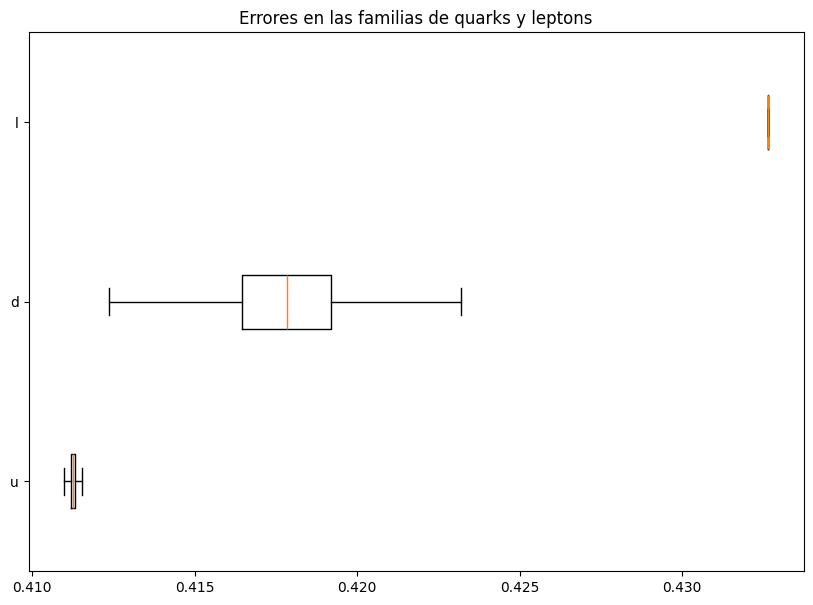

12

In [6]:
#Ahora construimos la gráfica de errores para cada matriz.
data1 = np.random.normal(C0u, DC0u, 10000)
data2 = np.random.normal(C0d, DC0d, 10000)
data3 = np.random.normal(C0l, DC0l, 10000)
data = [data1,data2,data3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.boxplot(data, labels=['u', 'd', 'l'], vert=0, showfliers=False)
plt.title("Errores en las familias de quarks y leptons")
#plt.savefig("ErroresFamiliasQuarksLeptones.png", dpi=300)
plt.show()

gc.collect()

## **Estudio bajo la consideración que las masas son puramente de Dirac:**

In [7]:
#Porque hice esta mamada???!!!
C03 = 2*np.sqrt(3/2)*C0l
C33 = 2*C3l
C83 = 2*C8l

#Suponiendo un valor fijo para la masa del neutrino mas pesado:
m3 = 0.05
m1 = (m3*C33+m3*np.sqrt(3)*C83)/2+m3
m2 = (m3*np.sqrt(3)*C83-m3*C33)/2+m3

print('C_03=', C03)
print('C_33=', C33)
print('C_83=', C83)

print('m_1 =', m1)
print('m_2 =', m2)
print('m_3 =', m3)

#Se encuentran las deltas usando estos valores:
Del21_D = m2**2-m1**2
Del32_D = m3**2-m2**2
print(Del21_D)
print(Del32_D)

gc.collect()

C_03= 1.0597511221761984
C_33= -0.05917595142554844
C_83= -1.1202032119064413
m_1 = 1.4379268766240294e-05
m_2 = 0.0029731768400436676
m_3 = 0.05
8.839573758801796e-06
0.0024911602194778283


0

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_18339/3957279509.py:14: SyntaxWarning: invalid escape sequence '\D'
  line1, = ax.plot(x, y1, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
/tmp/ipykernel_18339/3957279509.py:15: SyntaxWarning: invalid escape sequence '\D'
  line2, = ax.plot(x, y2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashed')
/tmp/ipykernel_18339/3957279509.py:17: SyntaxW

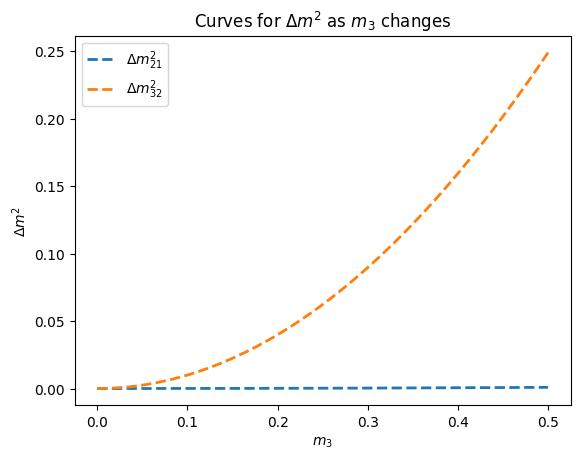

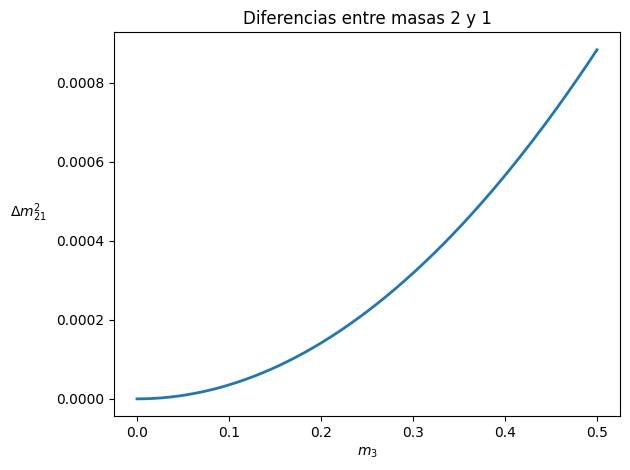

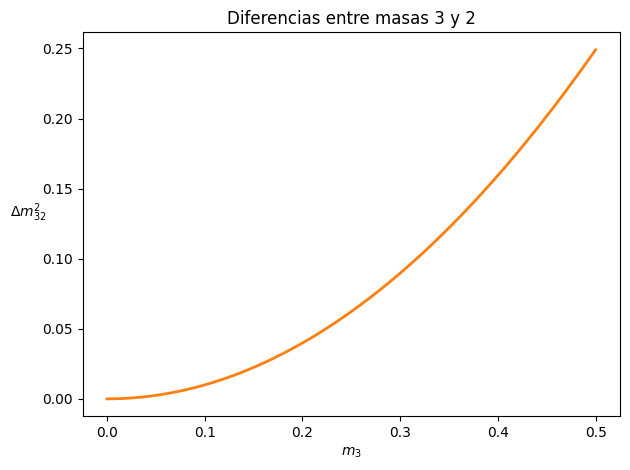

8103

In [8]:
#Ahora queremos representar gráficamente la relación entre estas diferencias de masa y 
#la masa fija.

def Dirac_Masa1(i):
    return ((i/2)*(C33+C03)-i/2)

def Dirac_Masa2(i):
    return ((i*C03-i-i*C33)/2)

y1 = Dirac_Masa2(x)**2-Dirac_Masa1(x)**2
y2 = x**2-Dirac_Masa2(x)**2

fig, ax = plt.subplots()
line1, = ax.plot(x, y1, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x, y2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashed')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m^2$')
ax.set_title('Curves for $\Delta m^2$ as $m_3$ changes')
ax.legend()
#plt.savefig("graf2eng.png", dpi=300)
plt.show()

##
# Aqui nos enfocamos en el comportamiento de la delta 2-1
##
fig, ax = plt.subplots()
ax.plot(x, y1, linewidth=2.0)
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{21}^2$', rotation=0, labelpad=20)
ax.set_title('Diferencias entre masas 2 y 1')
plt.tight_layout()
#plt.savefig("graf2-1.png", dpi=300)
plt.show()

##
# Aqui nos enfocamos en el comportamiento de la delta 2-1
##
fig, ax = plt.subplots()
ax.plot(x, y2, linewidth=2.0, color='tab:orange')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{32}^2$',rotation=0, labelpad=10)
ax.set_title('Diferencias entre masas 3 y 2')
plt.tight_layout()
#plt.savefig("graf2-2.png", dpi=300)
plt.show()

gc.collect()